# Apprentissage : TP1 - k-NN


**FEUILLET Laure, 5SDBD A2**

### Exercice 1 : Manipulation de la base de données
#### Importation des données

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('mnist-original') 

#### Exploration des données

Le dataset est composé de 70 000 entrées, chaque entrée étant représentée par 784 colonnes, les pixels d'une image 28x28 mis les uns à la suite des autres.
Les pixels sont dans `mnist.data` et les classes correspondantes dans `mnist.target`.

In [3]:
print(mnist)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [4]:
print("mnist.data.shape = " + str(mnist.data.shape))
print(mnist.data)

mnist.data.shape = (70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
print("mnist.target.shape = " + str(mnist.target.shape))
print(mnist.target)

mnist.target.shape = (70000,)
[0. 0. 0. ... 9. 9. 9.]


In [6]:
print("mnist.data[0].shape = " + str(mnist.data[0].shape))
print(mnist.data[0])

mnist.data[0].shape = (784,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 2

`mnist.data[0]` renvoie la 1ère entrée de `mnist.data`. Il s'agit d'une liste comportant les valeurs des 784 pixels de la 1ère image.

In [7]:
print(mnist.data[0][1])

0


`mnist.data[0][1]` renvoie le 2ème pixel de la 1ère image du dataset.

In [8]:
print("mnist.data[:,1].shape = " + str(mnist.data[:,1].shape))
print(mnist.data[:,1])

mnist.data[:,1].shape = (70000,)
[0 0 0 ... 0 0 0]


`mnist.data[:,1]` renvoie toutes les lignes de la 2ème colonne du dataset. Cela correspond aux pixels situés au même endroit sur toutes les images. 

In [9]:
print("mnist.data[:100].shape = " + str(mnist.data[:100].shape))
print(mnist.data[:100])

mnist.data[:100].shape = (100, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


`mnist.data[:100]` renvoie les vecteurs correspondant aux 100 premières images du dataset. 

#### Visualisation des données

In [10]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
images = mnist.data.reshape((-1, 28, 28))

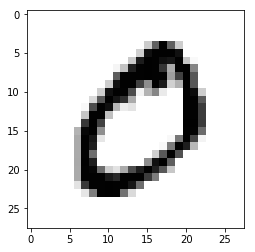

Valeur réelle : 0.0


In [12]:
indice = 0
plt.imshow(images[indice],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 
print(f"Valeur réelle : {mnist.target[indice]}")

`mnist.data.reshape((-1, 28, 28))` permet de transformer une liste de 28*28 = 784 éléments en matrice de taille 28x28.On l'utilise pour reconstituer nos images qui sont à l'origine une simple liste de pixels.
`images` contient donc toutes les matrices de pixels correspondant aux images.

La classe de la première image est récupérable avec `mnist.target[0]`. 
On voit bien que l'image affichée correspond à un 0.

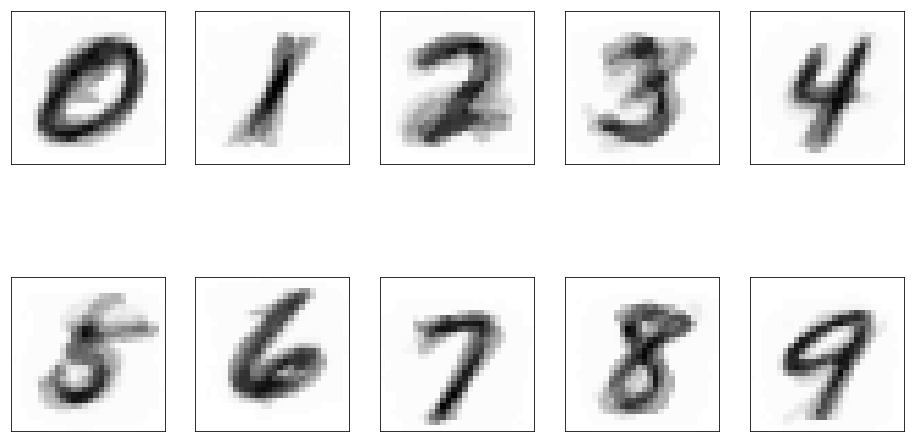

Wall time: 13min 7s


In [13]:
%%time
plt.figure(figsize=(16, 9))
for chiffre in range(0, 10):
    subplot = plt.subplot(2, 5, chiffre+1)
    subplot.get_xaxis().set_visible(False)
    subplot.get_yaxis().set_visible(False)
    for image in images[mnist.target == chiffre]: 
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest", alpha=0.3)
plt.show()

L'image ci-dessus représente l'allure de chaque chiffre. Elle a été obtenue en superposant toutes les images pour chaque chiffre, ce qui est possible avec le paramètre `alpha` qui correspond à la transparence de chaque image. Le 3 et le 5 semblent être les plus diffus. Il sera intéressant de voir si on obtient davantage d'erreurs pour ces chiffres.

### Exercice 2 : La méthode des k-NN

In [14]:
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
def normaliser_resultats(liste_tuples):
    """  param: une liste de tuples, ex : (grandeur, duree_entrainement, duree_prediction, erreur)
         Normalise tout sauf la grandeur. 
         Dans le but de trouver quelle est la valeur de la grandeur qui minimise les autres entrées. 
         return: une liste de tuples 
    """
    liste = list(zip(*liste_tuples))
    res = []
    res.append(liste[0])
    for vecteur in liste[1:]:
        min_liste = min(vecteur)
        max_liste = max(vecteur)
        inter = [(x - min_liste)/(max_liste-min_liste) for x in vecteur]
        res.append(tuple(inter))
    return list(zip(*res))

#### Echantillonnage des données

In [16]:
echantillon = np.random.randint(70000, size=5000)
data = mnist.data[echantillon]
print("data.shape = " + str(data.shape))
target = mnist.target[echantillon]
print("target.shape = " + str(target.shape))

data.shape = (5000, 784)
target.shape = (5000,)


#### Division entraînement / test

In [17]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target, train_size=0.8)
print("xtrain.shape = " + str(xtrain.shape))
print("xtest.shape = " + str(xtest.shape))
print("ytrain.shape = " + str(ytrain.shape))
print("ytest.shape = " + str(ytest.shape))

xtrain.shape = (4000, 784)
xtest.shape = (1000, 784)
ytrain.shape = (4000,)
ytest.shape = (1000,)


C:\Users\lkili\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Classifieur 10-NN

In [18]:
%%time
clf = neighbors.KNeighborsClassifier(10)
clf.fit(xtrain, ytrain)
print(f"Erreur sur le jeu d'entraînement : {str(1 - clf.score(xtrain, ytrain))}")
print(f"Erreur sur le jeu de test : {str(1 - clf.score(xtest, ytest))}")

Erreur sur le jeu d'entraînement : 0.0685
Erreur sur le jeu de test : 0.08199999999999996
Wall time: 24.8 s


On remarque que le score sur le jeu d'entraînement est meilleur que sur le jeu de test. C'est cohérent puisque le modèle s'est entraîné sur ces mêmes données et les connait donc déjà. 

In [19]:
print(mnist.target[4])
print(clf.predict(mnist.data[4].reshape((1,-1))))

0.0
[0.]


La classe de l'image 4, qui correspond à un 0, est prédite correctement. 

##### Recherche du `k` optimal

In [20]:
%%time
ks = []
print("Variations de k :")
for i in range(2, 16): 
    cl = neighbors.KNeighborsClassifier(i)
    debut_entrainement = time.time()
    cl.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = cl.predict(xtest)
    duree_prediction = time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    ks.append((i, duree_entrainement, duree_prediction, erreur))
    print(f"\t {ks[-1]}")

Variations de k :
	 (2, 0.14860200881958008, 4.926820755004883, 0.08099999999999996)
	 (3, 0.13763046264648438, 4.926820755004883, 0.07599999999999996)
	 (4, 0.1366734504699707, 4.97066068649292, 0.07699999999999996)
	 (5, 0.13970255851745605, 4.97561240196228, 0.07599999999999996)
	 (6, 0.14162135124206543, 4.9567389488220215, 0.08099999999999996)
	 (7, 0.13862919807434082, 5.174158573150635, 0.08299999999999996)
	 (8, 0.13763022422790527, 4.938788414001465, 0.08499999999999996)
	 (9, 0.13763046264648438, 4.9497575759887695, 0.07999999999999996)
	 (10, 0.13767266273498535, 4.946724891662598, 0.08199999999999996)
	 (11, 0.13767266273498535, 4.9537060260772705, 0.08099999999999996)
	 (12, 0.13967037200927734, 4.9985833168029785, 0.08099999999999996)
	 (13, 0.14266490936279297, 4.920788764953613, 0.08399999999999996)
	 (14, 0.13663458824157715, 4.923827171325684, 0.08299999999999996)
	 (15, 0.1356370449066162, 5.127283573150635, 0.08299999999999996)
Wall time: 1min 11s


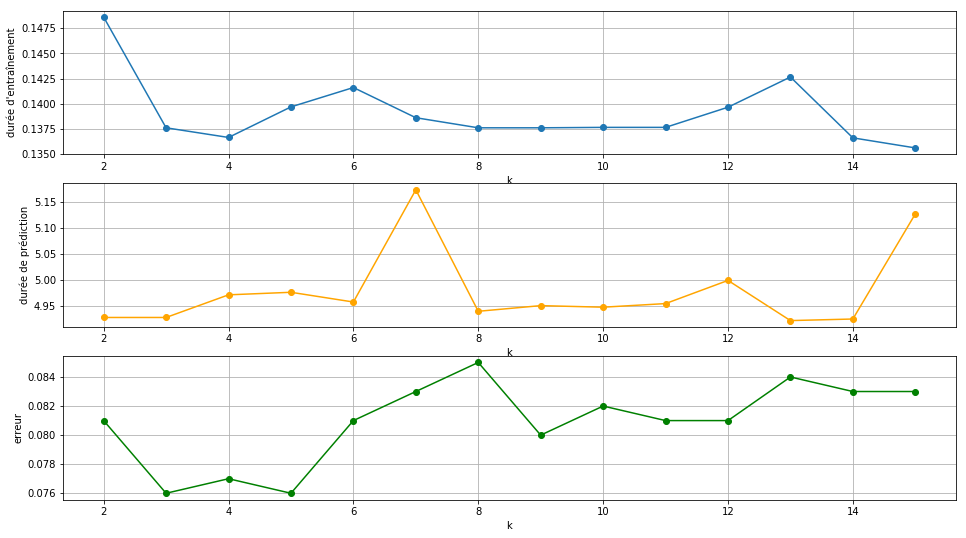

In [21]:
ks_liste = list(zip(*ks))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(ks_liste[0], ks_liste[1], 'o-')
plt.xlabel('k')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(ks_liste[0], ks_liste[2], 'o-', color='orange')
plt.xlabel('k')
plt.ylabel("durée de prédiction")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(ks_liste[0], ks_liste[3], 'o-', color='green')
plt.xlabel('k')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [22]:
meilleur_k = min(normaliser_resultats(ks), key=lambda item:(item[1]+item[2]+item[3]))[0]
print(f"Meilleur k = {meilleur_k}")

Meilleur k = 3


Essayons aussi avec de la cross-validation. 

In [23]:
%%time
cv_ks = []
print("Variations de k avec CV :")
for i in range(2, 16): 
    cl = neighbors.KNeighborsClassifier(i)
    debut = time.time()
    scores = model_selection.cross_val_score(cl, data, target, cv=10)
    duree = time.time() - debut
    erreur = 1 - np.mean(scores)
    cv_ks.append((i, duree, erreur))
    print(f"\t {cv_ks[-1]}")

Variations de k avec CV :
	 (2, 30.45552086830139, 0.08278277747766505)
	 (3, 28.798976182937622, 0.07420727237871816)
	 (4, 28.849815845489502, 0.07421561941415733)
	 (5, 30.772645473480225, 0.07142951395443209)
	 (6, 29.11712622642517, 0.0758369534564538)
	 (7, 28.821937561035156, 0.07521167329348954)
	 (8, 29.208807706832886, 0.07981680658347856)
	 (9, 29.76237392425537, 0.08021515048425898)
	 (10, 29.43538761138916, 0.08140091095902946)
	 (11, 28.48978281021118, 0.08141877925960339)
	 (12, 29.753366947174072, 0.08421657120877202)
	 (13, 30.828521728515625, 0.08522739529854773)
	 (14, 28.639378547668457, 0.08683395573605801)
	 (15, 29.285651206970215, 0.08902522188480566)
Wall time: 6min 52s


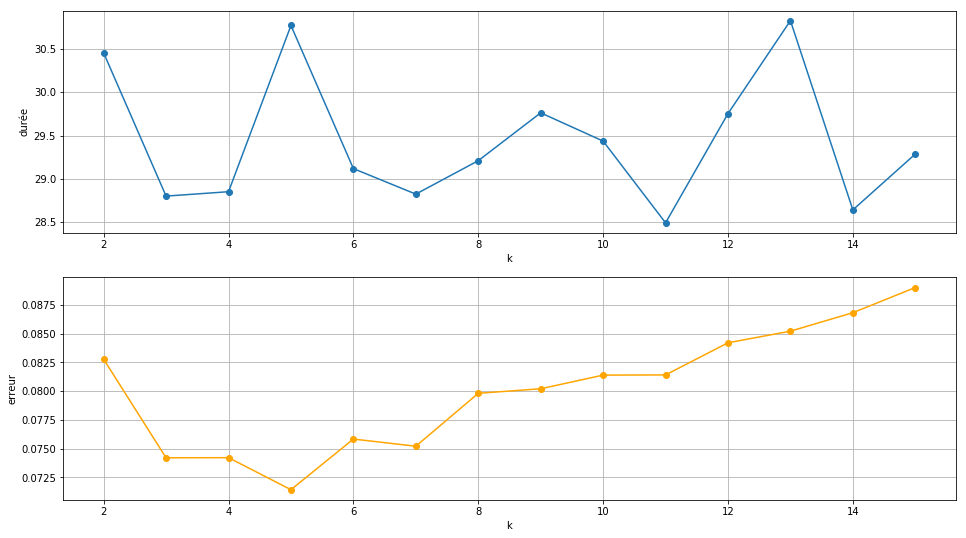

In [24]:
cv_ks_liste = list(zip(*cv_ks))

plt.figure(figsize=(16, 9))
plt.subplot(2, 1, 1)
plt.plot(cv_ks_liste[0], cv_ks_liste[1], 'o-')
plt.xlabel('k')
plt.ylabel("durée")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(cv_ks_liste[0], cv_ks_liste[2], 'o-', color='orange')
plt.xlabel('k')
plt.ylabel("erreur")
plt.grid(True)

plt.show() 

In [25]:
meilleur_k_cv = min(normaliser_resultats(cv_ks), key=lambda item:(item[1]+item[2]))[0]
print(f"Meilleur k avec CV = {meilleur_k_cv}")

Meilleur k avec CV = 3


Gardons le k obtenu avec la cross-validation, qui est plus précis. 

##### Variation des types de distance

In [26]:
%%time
distances = []
print("Variations du type de distance : ")
for i in range(1, 11): 
    cl = neighbors.KNeighborsClassifier(3, p=i)
    debut_entrainement = time.time()
    cl.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = cl.predict(xtest)
    duree_prediction= time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    distances.append((i, duree_entrainement, duree_prediction, erreur))
    print(f"\t {distances[-1]}")

Variations du type de distance : 
	 (1, 0.17857122421264648, 4.156827926635742, 0.08599999999999997)
	 (2, 0.1426377296447754, 4.925776481628418, 0.07599999999999996)
	 (3, 0.13767218589782715, 48.67473769187927, 0.07099999999999995)
	 (4, 0.14066576957702637, 43.969863414764404, 0.06899999999999995)
	 (5, 0.13967013359069824, 44.024174451828, 0.07199999999999995)
	 (6, 0.13966774940490723, 44.342325925827026, 0.07199999999999995)
	 (7, 0.13763189315795898, 44.09303379058838, 0.06699999999999995)
	 (8, 0.13966894149780273, 44.109946489334106, 0.06499999999999995)
	 (9, 0.13767290115356445, 44.35529136657715, 0.06599999999999995)
	 (10, 0.1397092342376709, 44.115890979766846, 0.06699999999999995)
Wall time: 6min 8s


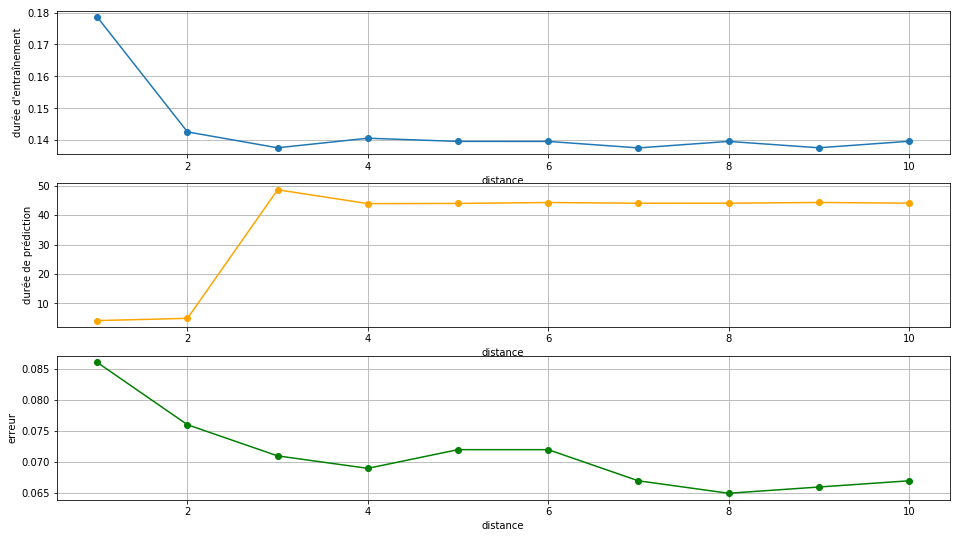

In [27]:
distances_liste = list(zip(*distances))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(distances_liste[0], distances_liste[1], 'o-')
plt.xlabel('distance')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(distances_liste[0], distances_liste[2], 'o-', color='orange')
plt.xlabel('distance')
plt.ylabel("durée de prédiction")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(distances_liste[0], distances_liste[3], 'o-', color='green')
plt.xlabel('distance')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [28]:
meilleure_distance = min(normaliser_resultats(distances), key=lambda item:(item[1]+item[2]+item[3]))[0]
print(f"Meilleure distance = {meilleure_distance}")

Meilleure distance = 2


##### Variations du % train / test

In [29]:
%%time
echantillons = []
print("Variations du % train/test : ")
for i in np.arange(0.7, 0.99, 0.01): 
    xtrain_echantillons, xtest_echantillons, ytrain_echantillons, ytest_echantillons = model_selection.train_test_split(data, target, train_size=i)
    cl = neighbors.KNeighborsClassifier(3)
    debut_entrainement = time.time()
    cl.fit(xtrain_echantillons, ytrain_echantillons)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = cl.predict(xtest)
    duree_prediction= time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    echantillons.append((i, duree_entrainement, duree_prediction, erreur))
    print(f"\t {echantillons[-1]}")

Variations du % train/test : 


C:\Users\lkili\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


	 (0.7, 0.11273932456970215, 3.6870944499969482, 0.05800000000000005)
	 (0.71, 0.10476016998291016, 3.698066473007202, 0.05300000000000005)
	 (0.72, 0.1077120304107666, 3.7479724884033203, 0.05800000000000005)
	 (0.73, 0.1216745376586914, 3.7818820476531982, 0.051000000000000045)
	 (0.74, 0.11070370674133301, 3.82377028465271, 0.06499999999999995)
	 (0.75, 0.11469340324401855, 3.856682062149048, 0.04800000000000004)
	 (0.76, 0.11668753623962402, 3.9304845333099365, 0.05500000000000005)
	 (0.77, 0.12969589233398438, 4.792137145996094, 0.061000000000000054)
	 (0.78, 0.13164782524108887, 4.871965408325195, 0.052000000000000046)
	 (0.79, 0.1326451301574707, 4.875956773757935, 0.05600000000000005)
	 (0.8, 0.13663434982299805, 4.9288129806518555, 0.04200000000000004)
	 (0.81, 0.13862919807434082, 4.968706846237183, 0.04700000000000004)
	 (0.8200000000000001, 0.1436154842376709, 5.065448522567749, 0.050000000000000044)
	 (0.8300000000000001, 0.14361572265625, 5.196099281311035, 0.046000000000

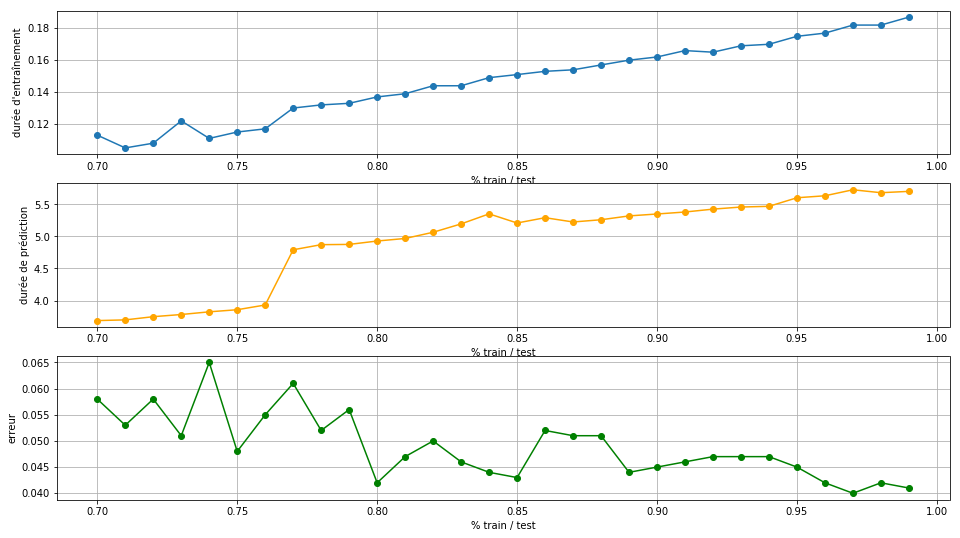

In [30]:
echantillons_liste = list(zip(*echantillons))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(echantillons_liste[0], echantillons_liste[1], 'o-')
plt.xlabel('% train / test')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(echantillons_liste[0], echantillons_liste[2], 'o-', color='orange')
plt.xlabel('% train / test')
plt.ylabel("durée de prédiction")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(echantillons_liste[0], echantillons_liste[3], 'o-', color='green')
plt.xlabel('% train / test')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [31]:
meilleur_echantillon = min(normaliser_resultats(echantillons), key=lambda item:(item[1]+item[2]+item[3]))[0]
print(f"Meilleur % train / test = {meilleur_echantillon}")

Meilleur % train / test = 0.75


On remarque que plus on augmente la taille du jeu d'entraînement par rapport au jeu de test, plus les durées d'entraînement et de prédiction augmentent.

L'erreur quand à elle diminue jusqu'à osciller autour de 4%, ce qui s'explique par un stade à partir duquel le modèle a assez de connaissances pour classifier les images, et les informations supplémentaires ne sont donc pas très utiles. 

##### Variation de la taille de l'échantillon d'entraînement

In [32]:
%%time
entrainements = []
for i in range(100, 4000, 200):
    echantillon_entrainement = np.random.randint(4000, size=i)
    xtrain_var = xtrain[echantillon_entrainement]
    ytrain_var = ytrain[echantillon_entrainement]
    cl = neighbors.KNeighborsClassifier(3)
    debut_entrainement = time.time()
    cl.fit(xtrain_var, ytrain_var)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = cl.predict(xtest)
    duree_prediction= time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    entrainements.append((i, duree_entrainement, duree_prediction, erreur))
    print(f"\t {entrainements[-1]}")

	 (100, 0.0009312629699707031, 0.10974478721618652, 0.381)
	 (300, 0.003063201904296875, 0.34205007553100586, 0.21699999999999997)
	 (500, 0.008014917373657227, 0.6073453426361084, 0.16800000000000004)
	 (700, 0.01004338264465332, 0.7608935832977295, 0.14200000000000002)
	 (900, 0.013962030410766602, 0.922532320022583, 0.14500000000000002)
	 (1100, 0.020986318588256836, 1.3264391422271729, 0.124)
	 (1300, 0.023953676223754883, 1.4840171337127686, 0.122)
	 (1500, 0.0279390811920166, 1.662548542022705, 0.124)
	 (1700, 0.03396177291870117, 1.8081028461456299, 0.10999999999999999)
	 (1900, 0.038910865783691406, 1.9707129001617432, 0.10399999999999998)
	 (2100, 0.052873849868774414, 2.568119764328003, 0.09999999999999998)
	 (2300, 0.05984663963317871, 2.725700616836548, 0.09999999999999998)
	 (2500, 0.06584453582763672, 2.8892574310302734, 0.10299999999999998)
	 (2700, 0.07576727867126465, 3.068814277648926, 0.10199999999999998)
	 (2900, 0.07880353927612305, 3.2153937816619873, 0.0979999999

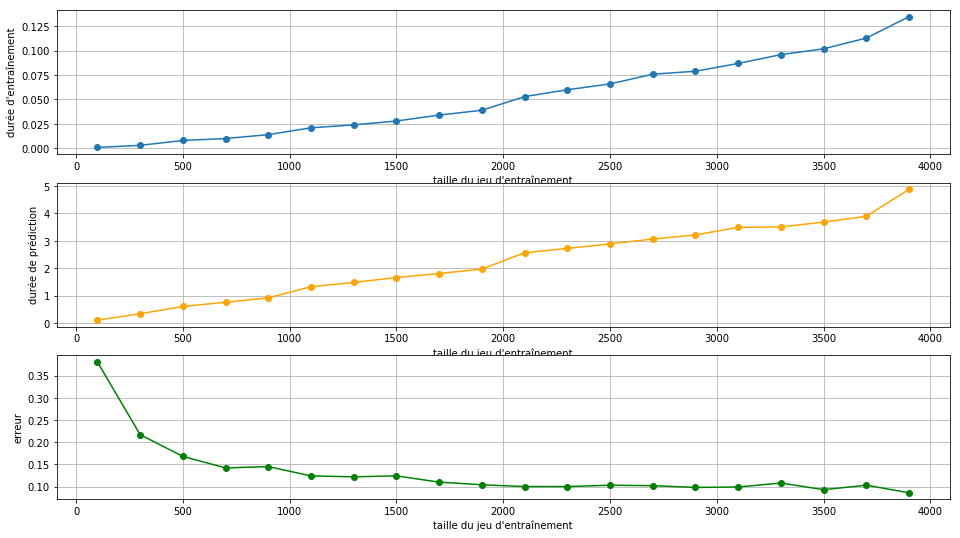

In [33]:
entrainements_liste = list(zip(*entrainements))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(entrainements_liste[0], entrainements_liste[1], 'o-')
plt.xlabel("taille du jeu d'entraînement")
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(entrainements_liste[0], entrainements_liste[2], 'o-', color='orange')
plt.xlabel("taille du jeu d'entraînement")
plt.ylabel("durée de prédiction")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(entrainements_liste[0], entrainements_liste[3], 'o-', color='green')
plt.xlabel("taille du jeu d'entraînement")
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [34]:
meilleur_entrainement = min(normaliser_resultats(entrainements), key=lambda item:(item[1]+item[2]+item[3]))[0]
print(f"Meilleure taille du jeu d'entraînement = {meilleur_entrainement}")

Meilleure taille du jeu d'entraînement = 700


Sans surprise, plus on augmente la taille du jeu d'entraînement, meilleurs sont les résultats, car on acquiert ainsi davantage de connaissances. Cependant, cela s'accompagne d'une augmentation des durées d'entraînement et de prédiction. 

##### Variations de n_jobs

In [35]:
%%time
parallelisations = []
for n_jobs in [-1] + list(range(1, 9)):
    cl = neighbors.KNeighborsClassifier(3, n_jobs=n_jobs)
    debut = time.time()
    cl.fit(xtrain, ytrain)
    duree_entrainement = time.time() - debut_entrainement
    debut_prediction = time.time()
    ypred = cl.predict(xtest)
    duree_prediction= time.time() - debut_prediction
    erreur = metrics.zero_one_loss(ytest, ypred)
    parallelisations.append((n_jobs, duree_entrainement, duree_prediction, erreur))
    print(f"\t {parallelisations[-1]}")

	 (-1, 5.477345705032349, 1.140350103378296, 0.07599999999999996)
	 (1, 6.84208607673645, 5.084394931793213, 0.07599999999999996)
	 (2, 12.08804988861084, 3.024913787841797, 0.07599999999999996)
	 (3, 15.276484966278076, 2.2171993255615234, 0.07599999999999996)
	 (4, 17.671247482299805, 1.9173214435577393, 0.07599999999999996)
	 (5, 19.790046453475952, 1.6169161796569824, 0.07599999999999996)
	 (6, 21.593459129333496, 1.4151973724365234, 0.07599999999999996)
	 (7, 23.211110591888428, 1.3154959678649902, 0.07599999999999996)
	 (8, 24.739983797073364, 1.1978950500488281, 0.07599999999999996)
Wall time: 20.6 s


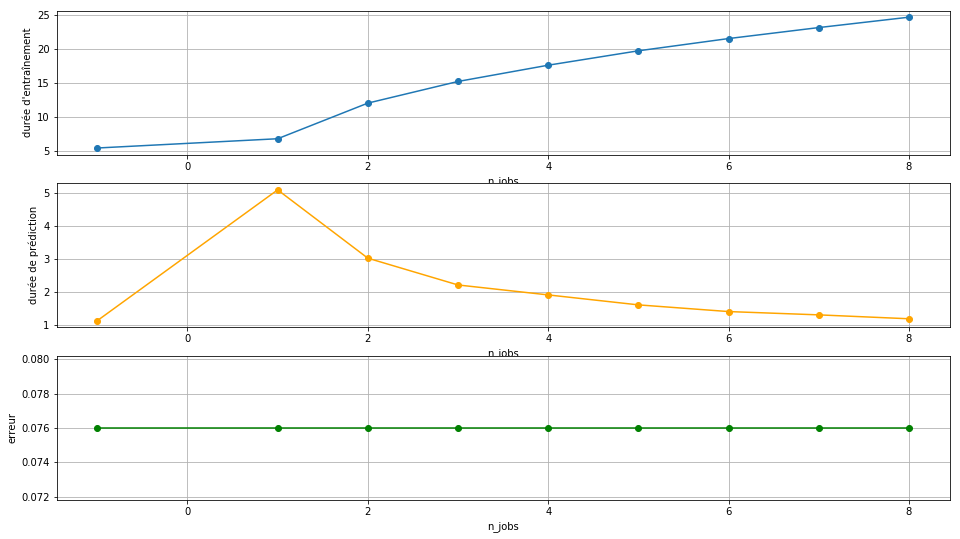

In [36]:
parallelisations_liste = list(zip(*parallelisations))

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(parallelisations_liste[0], parallelisations_liste[1], 'o-')
plt.xlabel('n_jobs')
plt.ylabel("durée d'entraînement")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(parallelisations_liste[0], parallelisations_liste[2], 'o-', color='orange')
plt.xlabel('n_jobs')
plt.ylabel("durée de prédiction")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(parallelisations_liste[0], parallelisations_liste[3], 'o-', color='green')
plt.xlabel('n_jobs')
plt.ylabel('erreur')
plt.grid(True)

plt.show() 

In [37]:
meilleur_n_jobs = min(normaliser_resultats(parallelisations), key=lambda item:(item[1]+item[2]+item[3]))[0]
print(f"Meilleure parallélisation = {meilleur_n_jobs}")

Meilleure parallélisation = -1


C:\Users\lkili\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


Le paramètre `n_jobs` représente le nombre de threads qui s'exécutent en parallèle. Plus la valeur est élevée, plus c'est rapide. `-1` permet de prendre la valeur maximale disponible, et correspond donc au modèle qui a les plus petites durées. Cela n'influe pas l'erreur du modèle, seulement les durées d'entraînement et de prédiction.

#### Modèle final
Grâce aux expériences précédentes, on peut conclure que dans notre cas le modèle de k-NN est le plus eficace avec les hyperparamètres suivants : 

In [38]:
print(f"Meilleur k = {meilleur_k}")
print(f"Meilleure distance : p = {meilleure_distance}")

Meilleur k = 3
Meilleure distance : p = 2


Evaluons ce modèle.

In [39]:
meilleur_clf = neighbors.KNeighborsClassifier(meilleur_k, p=meilleure_distance)

In [40]:
%%time
debut_entrainement = time.time()
meilleur_clf.fit(xtrain, ytrain)
meilleure_duree_entrainement = time.time() - debut_entrainement
debut_prediction = time.time()
ypred = meilleur_clf.predict(xtest)
meilleure_duree_prediction = time.time() - debut_prediction
cv_scores = model_selection.cross_val_score(meilleur_clf, data, target, cv=10)
meilleure_erreur = 1 - np.mean(cv_scores)

print(f"Durée de l'entraînement : {meilleure_duree_entrainement}")
print(f"Durée de la prédiction : {meilleure_duree_prediction}")
print(f"Erreur : {meilleure_erreur}")

Durée de l'entraînement : 0.17253494262695312
Durée de la prédiction : 5.052446126937866
Erreur : 0.07420727237871816
Wall time: 37.7 s


Regardons l'erreur par chiffre.

Erreur par chiffre : 
	 (0, 0.021505376344086002)
	 (1, 0.0)
	 (2, 0.07079646017699115)
	 (3, 0.10227272727272729)
	 (4, 0.1188118811881188)
	 (5, 0.09375)
	 (6, 0.012195121951219523)
	 (7, 0.07547169811320753)
	 (8, 0.16814159292035402)
	 (9, 0.08163265306122447)


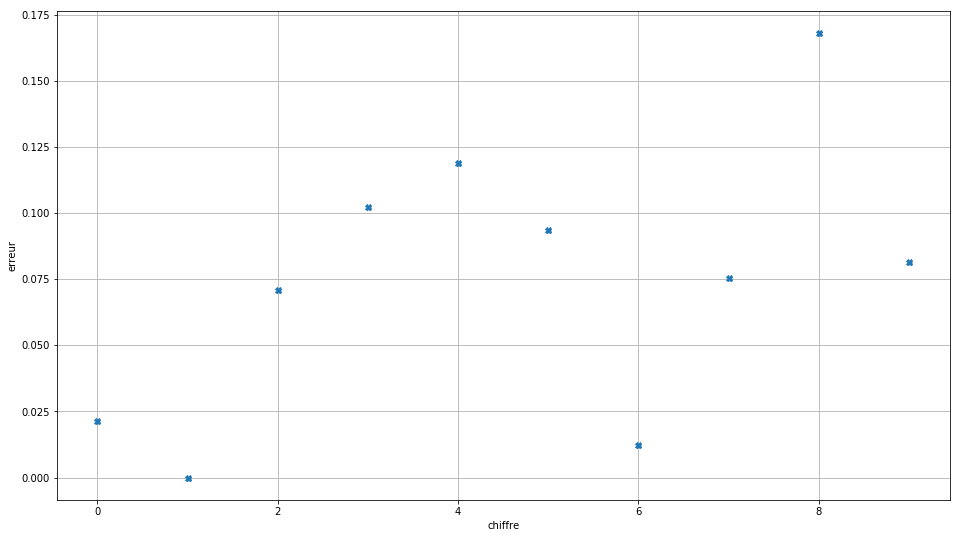

Chiffre le plus précis : 1
Chiffre le moins précis : 8


In [41]:
chiffres = []
print("Erreur par chiffre : ")
for chiffre in range (0, 10):
    erreur = 1 - (ypred[ytest==chiffre] == ytest[ytest==chiffre]).sum() / (ytest==chiffre).sum()
    chiffres.append((chiffre, erreur))
    print(f"\t {chiffres[-1]}")

plt.figure(figsize=(16, 9))
plt.plot(*zip(*chiffres), 'X')
plt.xlabel('chiffre')
plt.ylabel('erreur')
plt.grid(True)
plt.show()

meilleur_chiffre = min(chiffres, key=lambda item:(item[1]))[0]
pire_chiffre = max(chiffres, key=lambda item:(item[1]))[0]
print(f"Chiffre le plus précis : {meilleur_chiffre}")
print(f"Chiffre le moins précis : {pire_chiffre}")

Représentons maintenant la répartition des prédictions avec une matrice de confusion.

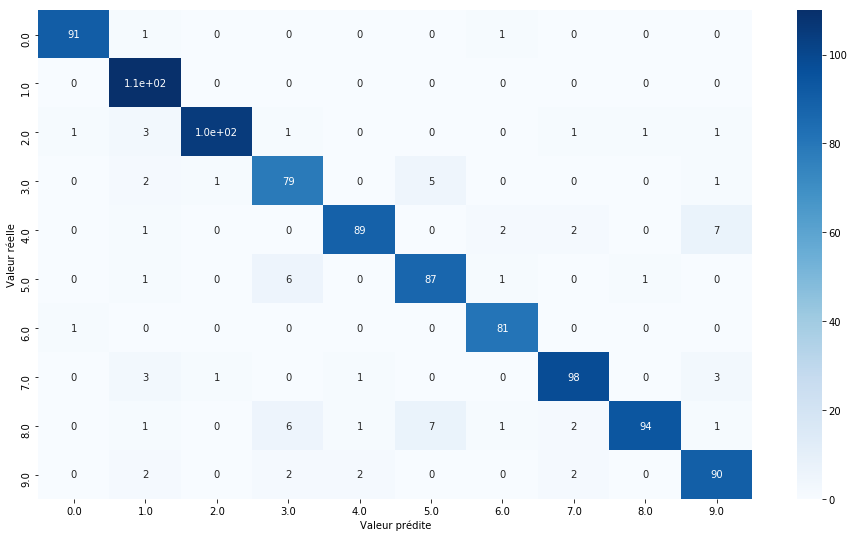

In [42]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

cm = confusion_matrix(ytest, ypred)
df_cm = pd.DataFrame(cm, columns=np.unique(ytest), index = np.unique(ytest))
df_cm.index.name = 'Valeur réelle'
df_cm.columns.name = 'Valeur prédite'
plt.figure(figsize = (16,9))
sn.heatmap(df_cm, cmap="Blues", annot=True)
plt.show()